# Datenschutz-Grundlagenschulung Auswertungen

## Setup

In [1]:
!pip install openpyxl

import numpy as np  # Numpy für numerische Berechnungen
import pandas as pd  # Pandas für Datenverarbeitung und -analyse
import matplotlib.pyplot as plt  # Matplotlib für Visualisierung
import seaborn as sns  # Seaborn für fortgeschrittene Datenvisualisierung


# Bewirkt, dass matplotlib-Diagramme direkt im Notebook gerendert werden.
%matplotlib inline

# Lädt das autoreload-Modul, das automatische Code-Neuladen ermöglicht.
%reload_ext autoreload

# Stellt sicher, dass alle Module automatisch neu geladen werden, wenn sie geändert werden.
%autoreload 2

## Datenimport

### Active Directory

In [2]:
ad_file_path = "/Users/rubenantenen/Library/CloudStorage/OneDrive-HochschuleLuzern/Datenschutz/Projekte/P2410 DSGS Organisation/Reporting 2025/2025.03/userimport.csv"

ad_df = pd.read_csv(ad_file_path, sep=';', encoding='utf-8')

ad_df.head()

,username,emailaddresses,firstname,lastname,authenticationprovider,userdatasourceid,languageid,department,usergroup,site,country,description,created
0,mbaeurle,monika.baeurle@hslu.ch,Monika,Bäurle,ldap,LDAP,de,Design Film Kunst,NaN,Nylsuisseplatz 1,Emmenbrücke,Mitarbeiterin/Mitarbeiter,17.06.2009
1,kagruete,jean-pierre.grueter@hslu.ch,Jean-Pierre,Grüter,ldap,LDAP,de,Design Film Kunst,NaN,Spinnereistrasse 7,Emmenbrücke,Mitarbeiterin/Mitarbeiter,17.06.2009
2,ckoch,caroline.kaelin@hslu.ch,Caroline,Kälin,ldap,LDAP,de,Design Film Kunst,NaN,Nylsuisseplatz 1,Emmenbrücke,Mitarbeiterin/Mitarbeiter,17.06.2009
3,kagraf,andre.graf@hslu.ch,André,Graf,ldap,LDAP,de,Design Film Kunst,NaN,NaN,Luzern,externe(r) Mitarbeiterin/Mitarbeiter,17.06.2009
4,kboderma,rene.odermatt@hslu.ch,René,Odermatt,ldap,LDAP,de,Design Film Kunst,NaN,Nylsuisseplatz 1,Emmenbrücke,Mitarbeiterin/Mitarbeiter,17.06.2009


### Ilias

In [3]:
# Pfad zur Datei
ilias_fp = "/Users/rubenantenen/Library/CloudStorage/OneDrive-HochschuleLuzern/Datenschutz/Projekte/P2410 DSGS Organisation/Reporting 2025/2025.03/export feb25.xlsx"

# Einlesen des spezifischen Worksheets mit Start ab Zeile 8
ilias_df = pd.read_excel(ilias_fp, sheet_name="Teilnehmer zeigen Wissenskontro", skiprows=7, usecols="A:I")

# Die ersten Zeilen anzeigen
ilias_df.head()

,Anmeldename,Vorname,Nachname,Erster Zugriff,Letzter Zugriff,Zugriffe,Zeit,Prozent,Status
0,sarhyner,Aaron,Rhyner,"4. Jun 2024, 14:05","4. Jun 2024, 14:14",1,8 Minuten 29 Sekunden,100%,Bearbeitet
1,tapata,Achille,Patà,"2. Sep 2024, 13:58","2. Sep 2024, 14:01",1,3 Minuten 22 Sekunden,83%,Bearbeitet
2,tbschnei,Achim,Schneider,"14. Aug 2024, 11:57","14. Aug 2024, 11:58",1,1 Minute 38 Sekunden,83%,Bearbeitet
3,tasmajic,Adela,Smajic,"2. Sep 2024, 17:48","2. Sep 2024, 17:49",1,1 Minute 29 Sekunden,100%,Bearbeitet
4,tchochul,Adina,Hochuli,"16. Aug 2024, 09:58","16. Aug 2024, 10:00",1,2 Minuten 2 Sekunden,100%,Bearbeitet


### Dataframe für Reporting generieren

In [11]:
# Zusammenführung der beiden DataFrames basierend auf den Keys
dsgs_df = ad_df.merge(
    ilias_df, 
    left_on="username",  # PK in ad_df
    right_on="Anmeldename",  # PK/FK in ilias_df
    how="left"  # Führend ist ad_df (left join)
)

# Filtern nach "Mitarbeiterin/Mitarbeiter"
dsgs_df = dsgs_df[dsgs_df["description"] == "Mitarbeiterin/Mitarbeiter"]

# Neues Boolean-Feld "Erfolg" hinzufügen
dsgs_df["Erfolg"] = dsgs_df["Status"] == "Bearbeitet"

dsgs_df.head()

,username,emailaddresses,firstname,lastname,authenticationprovider,userdatasourceid,languageid,department,usergroup,site,...,Anmeldename,Vorname,Nachname,Erster Zugriff,Letzter Zugriff,Zugriffe,Zeit,Prozent,Status,Erfolg
0,mbaeurle,monika.baeurle@hslu.ch,Monika,Bäurle,ldap,LDAP,de,Design Film Kunst,NaN,Nylsuisseplatz 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,kagruete,jean-pierre.grueter@hslu.ch,Jean-Pierre,Grüter,ldap,LDAP,de,Design Film Kunst,NaN,Spinnereistrasse 7,...,kagruete,Jean-Pierre,Grüter,"7. Jun 2024, 16:03","7. Jun 2024, 16:05",1,2 Minuten 15 Sekunden,100%,Bearbeitet,True
2,ckoch,caroline.kaelin@hslu.ch,Caroline,Kälin,ldap,LDAP,de,Design Film Kunst,NaN,Nylsuisseplatz 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,kboderma,rene.odermatt@hslu.ch,René,Odermatt,ldap,LDAP,de,Design Film Kunst,NaN,Nylsuisseplatz 1,...,kboderma,René,Odermatt,"29. Mai 2024, 14:29","29. Mai 2024, 14:36",2,1 Minute 8 Sekunden,100%,Bearbeitet,True
5,pthome,pierre.thome@hslu.ch,Pierre,Thomé,ldap,LDAP,de,Design Film Kunst,NaN,Nylsuisseplatz 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


## Reporting

### Erfolgsquote in Prozent

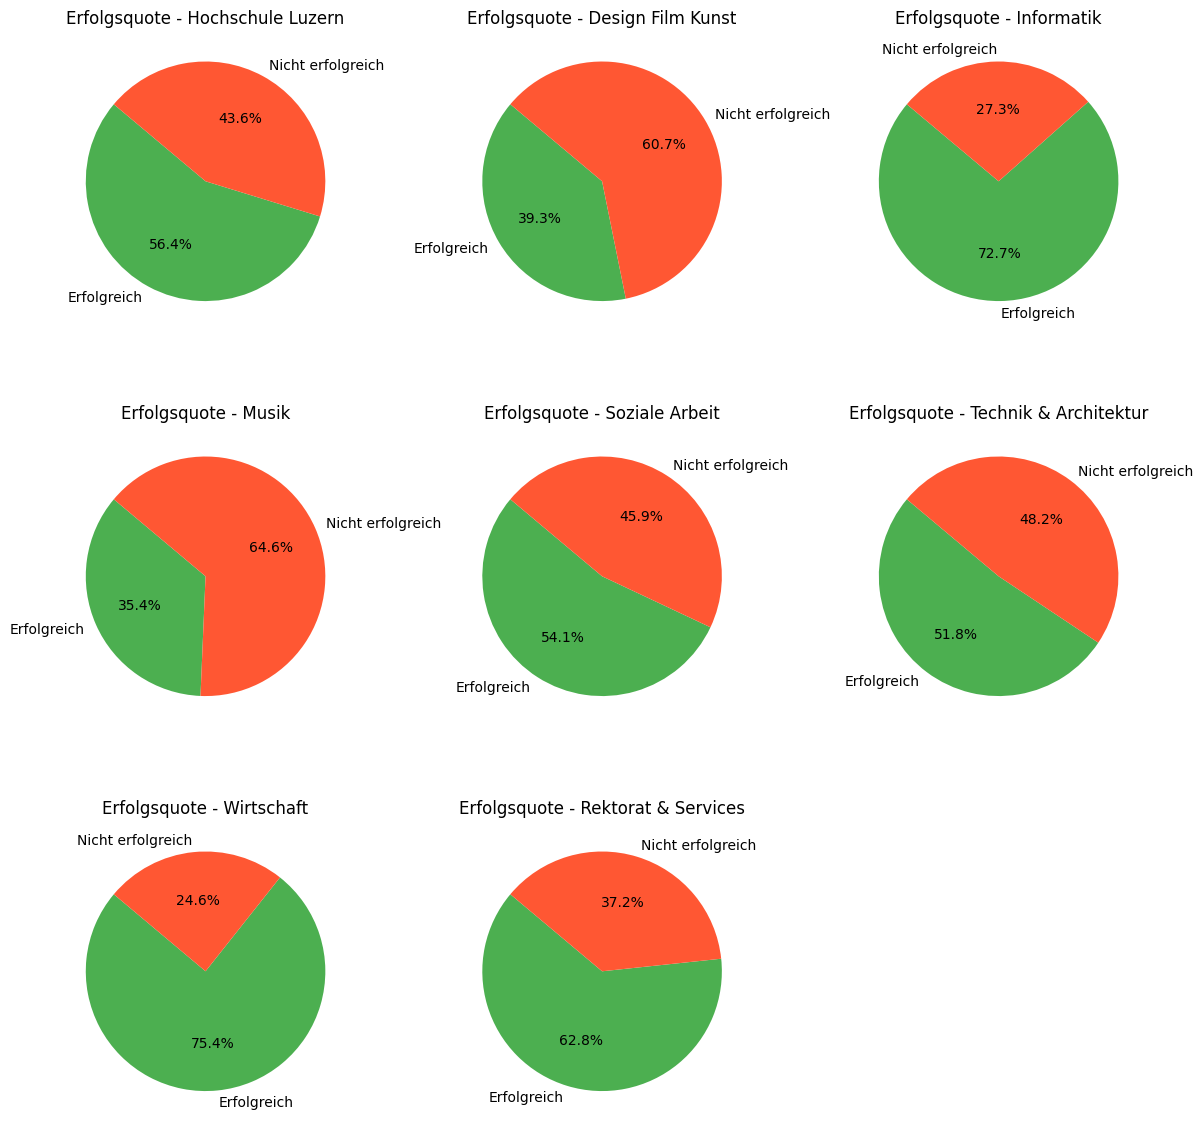

In [31]:
# Einheitliche Farben für alle Pie-Charts
colors = ["#4CAF50", "#FF5733"]  # Erfolgreich = Grün, Nicht erfolgreich = Rot

# Sicherstellen, dass department keine NaN-Werte enthält
dsgs_df["department"] = dsgs_df["department"].fillna("Unbekannt")

# Zusatzreihe für die Hochschule Luzern hinzufügen
dsgs_df_total = dsgs_df.copy()
dsgs_df_total["department"] = "Hochschule Luzern"
dsgs_df_combined = pd.concat([dsgs_df, dsgs_df_total])

# **Sortierung der Kategorien**
departments_sorted = list(dsgs_df_combined["department"].unique())  # Eindeutige Werte sicherstellen
departments_sorted = sorted(set(departments_sorted))  # Alphabetisch sortieren

# Falls vorhanden, "Hochschule Luzern" an den Anfang setzen und "Rektorat & Services" ans Ende
if "Hochschule Luzern" in departments_sorted:
    departments_sorted.remove("Hochschule Luzern")
    departments_sorted.insert(0, "Hochschule Luzern")
if "Rektorat & Services" in departments_sorted:
    departments_sorted.remove("Rektorat & Services")
    departments_sorted.append("Rektorat & Services")

# Department als kategorische Variable mit sortierter Reihenfolge setzen
dsgs_df_combined["department"] = pd.Categorical(
    dsgs_df_combined["department"], categories=departments_sorted, ordered=True
)

# Funktion für das Zeichnen der Pie-Charts
def pie_chart(data, **kwargs):
    erfolg_count = data["Erfolg"].sum()
    nicht_erfolg_count = len(data) - erfolg_count
    labels = ["Erfolgreich", "Nicht erfolgreich"]
    sizes = [erfolg_count, nicht_erfolg_count]

    # Pie-Chart mit einheitlichen Farben
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140) # Variante mit Farben
    plt.title(f"Erfolgsquote - {data['department'].iloc[0]}")

# FacetGrid mit der sortierten Reihenfolge der Departemente
g = sns.FacetGrid(dsgs_df_combined, col="department", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(pie_chart)
plt.show()